In [1]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from rubin_sim.phot_utils import Bandpass
from rubin_sim.data import get_data_dir
import syseng_throughputs as st

In [2]:
# default = 'update'
defaultDirs = st.setDefaultDirs()
# ref = 'previous/main'
refDir = os.path.join(get_data_dir(), 'throughputs', 'baseline')

# Read the individual and combined vendor detectors and plot.
detector_rootdir = defaultDirs['detector'].replace('/joint_minimum', '')
print('detector options"', os.listdir(detector_rootdir))

detector options" ['joint_minimum', 'e2v', 'itl']


In [3]:
det = {}
det['e2v'] = st.buildVendorDetector(os.path.join(detector_rootdir, 'e2v'), addLosses=True)
det['itl'] = st.buildVendorDetector(os.path.join(detector_rootdir, 'itl'), addLosses=True)
det['det'] = st.buildDetector(defaultDirs['detector'])
refdet = {}
refdet['det'] = Bandpass()
refdet['det'].read_throughput(os.path.join(refDir, 'detector.dat'))

Text(0.5, 0, 'Wavelength (nm)')

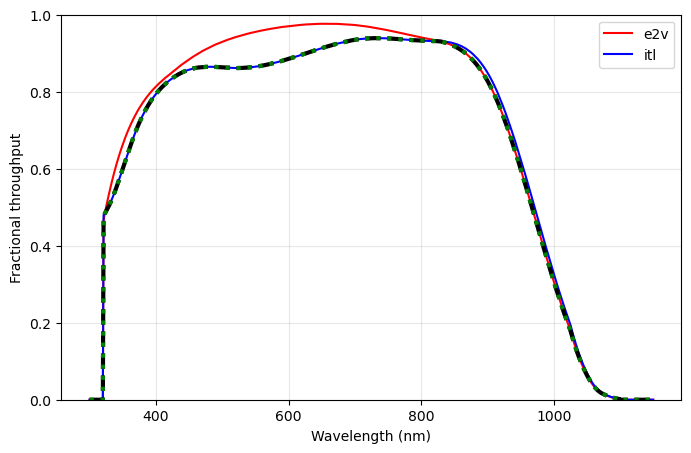

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(det['e2v'].wavelen, det['e2v'].sb, 'r-', label='e2v')
plt.plot(det['itl'].wavelen, det['itl'].sb, 'b-', label='itl')
plt.plot(det['det'].wavelen, det['det'].sb, 'k--', linewidth=3)
plt.plot(refdet['det'].wavelen, refdet['det'].sb, 'g:', linewidth=3)
#plt.plot(det['det'].wavelen, refdet['det'].sb, 'k:', linewidth=3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

In [5]:
lens = {}
for l in ('lens1', 'lens2', 'lens3'):
    lens[l] = st.buildLens(defaultDirs[l], addLosses=True)
    
reflens = {}
for l in ('lens1', 'lens2', 'lens3'):
    reflens[l] = Bandpass()
    reflens[l].read_throughput(os.path.join(refDir, l + ".dat"))

Text(0.5, 0, 'Wavelength (nm)')

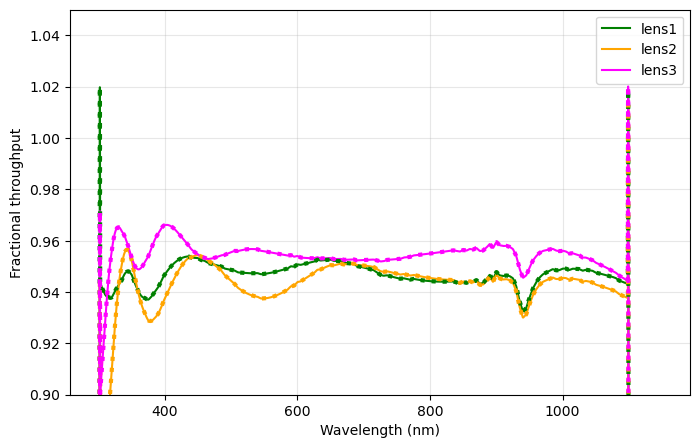

In [6]:
colors= {}
colors['lens1'] = 'green'
colors['lens2'] = 'orange'
colors['lens3'] = 'magenta'
plt.figure(figsize=(8, 5))
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(lens[l].wavelen, lens[l].sb, color=colors[l],
            label=l)
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(reflens[l].wavelen, reflens[l].sb, 
             linestyle=':', color=colors[l], linewidth=3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylim(0.9, 1.05)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

Text(0.5, 0, 'Wavelength (nm)')

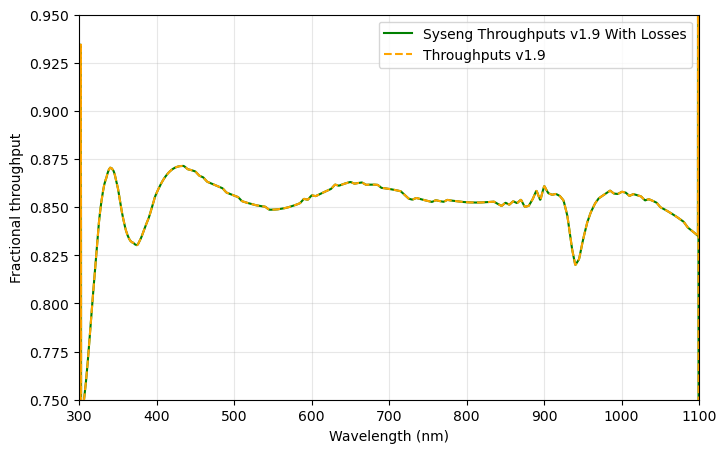

In [7]:
combo_lens = Bandpass()
combo_lens = lens['lens1'].sb * lens['lens2'].sb * lens['lens3'].sb

ref_lens = Bandpass()
ref_lens = reflens['lens1'].sb * reflens['lens2'].sb * lens['lens3'].sb

wavelen = lens['lens1'].wavelen

plt.figure(figsize=(8,5))
plt.plot(wavelen, combo_lens, color = 'green', linestyle='-', label="Syseng Throughputs v1.9 With Losses")
plt.plot(wavelen, ref_lens, color='orange', linestyle='--', label="Throughputs v1.9")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(300, 1100)
plt.ylim(0.75, 0.95)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

In [8]:
df=pd.read_excel('LCA-18-asbuilt-20210818.xlsx',sheet_name='Performance summary as-built',header=7,
                usecols='A,Z:AE')
# These are the filter columns. The description in LCA-18 is "filter coating" -- should glass be added??

wavelength=df.iloc[:,0]
u=df['u.3']
g=df['g.3']
r=df['r.3']
i=df['i.3']
z=df['z.3']
y=df['y.3']

df=pd.read_excel('LCA-18-asbuilt-20210818.xlsx',sheet_name='Performance summary as-built',header=7,
                usecols='P:AG')
# these are the L1, L2, L3 columns plus run over the (same as above) filter coatings. 
# The lens columns are not named in the output

L1glass=df.iloc[:,0]
L1BBAR=df.iloc[:,1]
L2glass=df.iloc[:,2]
L2BBAR=df.iloc[:,3]
L3glass=df.iloc[:,16]
L3BBAR=df.iloc[:,17]

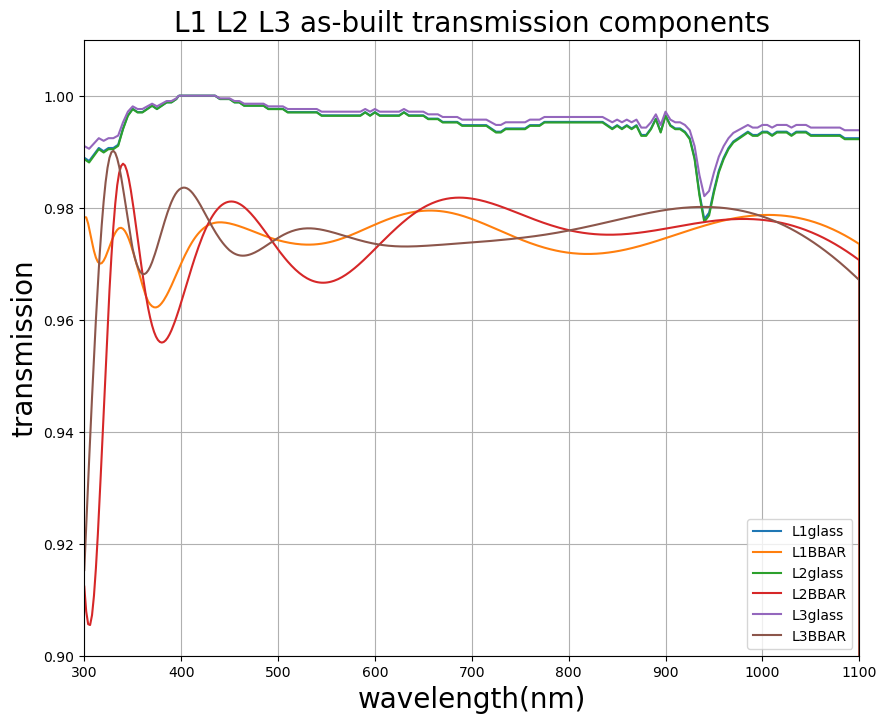

In [9]:
fig = plt.figure(1,[10,8]) # define figure 1
ax = fig.add_subplot() 
ax.set_xlabel('wavelength(nm)',size=20)                 #labels
ax.set_ylabel('transmission',size=20)
ax.set_xlim(300.,1100.)
ax.set_title('L1 L2 L3 as-built transmission components', size=20)
ax.grid(True)                  # form grid
plt.plot(wavelength,L1glass, marker='', linestyle='-',label='L1glass') 
plt.plot(wavelength,L1BBAR, marker='', linestyle='-', label='L1BBAR') 
plt.plot(wavelength,L2glass, marker='', linestyle='-',label='L2glass') 
plt.plot(wavelength,L2BBAR, marker='', linestyle='-', label='L2BBAR') 
plt.plot(wavelength,L3glass, marker='', linestyle='-', label='L3glass') 
plt.plot(wavelength,L3BBAR, marker='', linestyle='-', label='L3BBAR')
ax.set(ylim=(0.9,1.01))
plt.legend()
fsize=20
fweight=500
plt.show();

In [10]:
lca18 = Bandpass()
lca18.set_bandpass(wavelen=wavelength.values, sb = (L1glass *  L1BBAR * L2glass * L2BBAR * L3glass * L3BBAR).values)

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:82: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


In [11]:
lens = {}
for l in ('lens1', 'lens2', 'lens3'):
    lens[l] = st.buildLens(defaultDirs[l], addLosses=False)
    
reflens = {}
for l in ('lens1', 'lens2', 'lens3'):
    reflens[l] = Bandpass()
    reflens[l].read_throughput(os.path.join(refDir, l + ".dat"))

Text(0.5, 0, 'Wavelength (nm)')

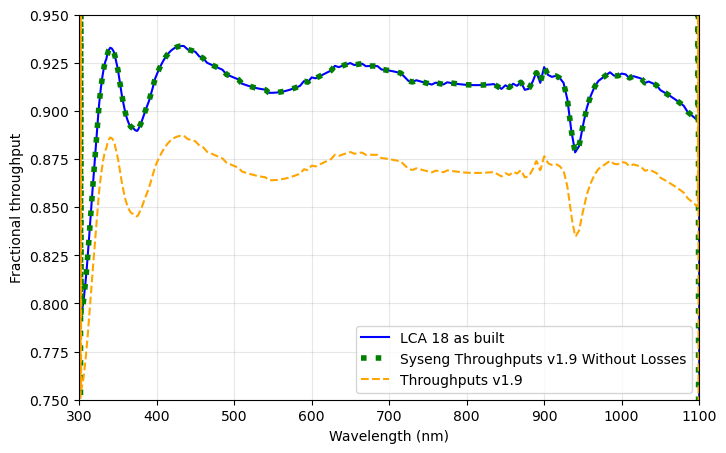

In [12]:
combo_lens = Bandpass()
combo_lens = lens['lens1'].sb * lens['lens2'].sb * lens['lens3'].sb

ref_lens = Bandpass()
ref_lens = reflens['lens1'].sb * reflens['lens2'].sb * lens['lens3'].sb

wavelen = lens['lens1'].wavelen

plt.figure(figsize=(8,5))
plt.plot(lca18.wavelen, lca18.sb, color='blue', linestyle='-', label="LCA 18 as built")
plt.plot(wavelen, combo_lens, color = 'green', linestyle=':', linewidth=4, label="Syseng Throughputs v1.9 Without Losses")
plt.plot(wavelen, ref_lens, color='orange', linestyle='--', label="Throughputs v1.9")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(300, 1100)
plt.ylim(0.75, 0.95)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')